# Analyse des courbes d'excitation électronique simple

Le bloc de code ci-dessous permet d'installer les modules requis à l'analyse.

In [142]:
# ! python.exe -m pip install --upgrade pip
# ! pip install -r requirements.txt

In [143]:
from outils_analyse.fits import gaussian_fit, gaus
from outils_analyse.identification_des_pics import determiner_indexes_maximums_scipy
from outils_analyse.lecture_des_fichiers import lire_csv_a_3_colonnes, crop_pour_conserver_que_la_partie_avec_rampe
from outils_analyse.conversion_temps_en_potentiel import \
    calculer_facteur_conversion_temps_en_potentiel_avec_mesure_rampe
import matplotlib.pyplot as plt
import os
import matplotlib
import numpy as np
from sigfig import round
# Grosseur du text dans les figures
matplotlib.rcParams.update({'font.size': 18})
# Chemin d'accès des figures produites
out_dir = os.path.join("graphiques", "anal_profond")
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
import warnings
warnings.filterwarnings("ignore")
# Couleur des graphiques
import seaborn as sns
palette = sns.color_palette("muted")
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

## Copie de l'analyse légère pour un pic
> Mettre les valeurs extraites à la place de `exemples_de_fichiers\exemple_de_donnees.csv`

In [144]:
file_name = os.path.join("data", "Montage_B_step6.2.csv")
valeurs_en_array = lire_csv_a_3_colonnes(file_name, 9)
valeurs_cropped_debutant_par_t0 = crop_pour_conserver_que_la_partie_avec_rampe(valeurs_en_array, 2, 0.05, 0.1)

debut = min(valeurs_cropped_debutant_par_t0[:,0])
valeurs_cropped_debutant_par_t0[:,0]-=debut

facteur_conversion_temps_en_potentiel = calculer_facteur_conversion_temps_en_potentiel_avec_mesure_rampe(
    valeurs_cropped_debutant_par_t0, 0, 2)

valeurs_avec_bonnes_unites = valeurs_cropped_debutant_par_t0.copy()
valeurs_avec_bonnes_unites[:, 0] = -facteur_conversion_temps_en_potentiel[0] * valeurs_cropped_debutant_par_t0[:, 0] 

facteur_valeur = facteur_conversion_temps_en_potentiel[0]
facteur_incertitude = facteur_conversion_temps_en_potentiel[1]

liste_des_indexes_des_pics = determiner_indexes_maximums_scipy(valeurs_avec_bonnes_unites, 1,distance_minimum=100)

valeurs_avec_bonnes_unites_determination_des_pics = valeurs_avec_bonnes_unites[liste_des_indexes_des_pics]
liste_des_indexes_des_pics = liste_des_indexes_des_pics

## Régression gaussienne et potentiel de contact
> Modifier `pic#_index_start` et `pic#_index_end` au besoin.

In [149]:
pic1_index_start, pic1_index_end = liste_des_indexes_des_pics[0]-50, liste_des_indexes_des_pics[0]+50
peak1 = gaussian_fit(valeurs_avec_bonnes_unites[pic1_index_start:pic1_index_end,0], valeurs_avec_bonnes_unites[pic1_index_start:pic1_index_end,1],
                    valeurs_avec_bonnes_unites_determination_des_pics[0,1], valeurs_avec_bonnes_unites_determination_des_pics[0,0], 1)

pic2_index_start, pic2_index_end = liste_des_indexes_des_pics[1]-50, liste_des_indexes_des_pics[1]+50
peak2 = gaussian_fit(valeurs_avec_bonnes_unites[pic2_index_start:pic2_index_end,0],valeurs_avec_bonnes_unites[pic2_index_start:pic2_index_end,1],
                    valeurs_avec_bonnes_unites_determination_des_pics[1,1], valeurs_avec_bonnes_unites_determination_des_pics[1,0],1)

pic3_index_start, pic3_index_end = liste_des_indexes_des_pics[2]-50, liste_des_indexes_des_pics[2]+50
peak3 = gaussian_fit(valeurs_avec_bonnes_unites[pic3_index_start:pic3_index_end,0],valeurs_avec_bonnes_unites[pic3_index_start:pic3_index_end,1],
                    valeurs_avec_bonnes_unites_determination_des_pics[2,1], valeurs_avec_bonnes_unites_determination_des_pics[2,0],1)

pic4_index_start, pic4_index_end = liste_des_indexes_des_pics[3]-50, liste_des_indexes_des_pics[3]+50
peak4 = gaussian_fit(valeurs_avec_bonnes_unites[pic4_index_start:pic4_index_end,0], valeurs_avec_bonnes_unites[pic4_index_start:pic4_index_end,1],
                    valeurs_avec_bonnes_unites_determination_des_pics[3,1], valeurs_avec_bonnes_unites_determination_des_pics[3,0],1)

def rounding_peaks(peaks):
    all_values = []
    for i in range(0, 3):
        all_values.append(round(peaks[0][i], uncertainty=peaks[1][i], cutoff=5))

    return all_values

print(f"Pic 1 -\t Moyenne \t : {rounding_peaks(peak1)[1]}\n",
    f"\t STD \t \t : {rounding_peaks(peak1)[2]}\n",
    f"\t Amplitude \t : {rounding_peaks(peak1)[0]}\n")
print(f"Pic 2 -\t Moyenne \t : {rounding_peaks(peak2)[1]}\n",
    f"\t STD \t \t : {rounding_peaks(peak2)[2]}\n",
    f"\t Amplitude \t : {rounding_peaks(peak2)[0]}\n")
print(f"Pic 3 -\t Moyenne \t : {rounding_peaks(peak3)[1]}\n",
    f"\t STD \t \t : {rounding_peaks(peak3)[2]}\n",
    f"\t Amplitude \t : {rounding_peaks(peak3)[0]}\n")
print(f"Pic 4 -\t Moyenne \t : {rounding_peaks(peak4)[1]}\n",
    f"\t STD \t \t : {rounding_peaks(peak4)[2]}\n",
    f"\t Amplitude \t : {rounding_peaks(peak4)[0]}\n")

# Ref - Pic 1: Moyenne: 2.04 ± 0.02 STD: -0.44 ± 0.02 Amplitude: 0.083 ± 0.004
#       Pic 2: Moyenne: 6.91 ± 0.01 STD: 0.82 ± 0.01 Amplitude: 0.459 ± 0.006
#       Pic 3: Moyenne: 12.00 ± 0.01 STD: 1.09 ± 0.01 Amplitude: 0.96 ± 0.01
#       Pic 4: Moyenne: 17.14 ± 0.01 STD: 1.26 ± 0.01 Amplitude: 1.365 ± 0.007

Pic 1 -	 Moyenne 	 : 0 ± 200000000
 	 STD 	 	 : 0 ± 80000000
 	 Amplitude 	 : 0 ± 2000

Pic 2 -	 Moyenne 	 : 7.43 ± 0.05
 	 STD 	 	 : 0.47 ± 0.05
 	 Amplitude 	 : 0.030 ± 0.003

Pic 3 -	 Moyenne 	 : 12.560 ± 0.008
 	 STD 	 	 : 0.826 ± 0.008
 	 Amplitude 	 : 0.0744 ± 0.0006

Pic 4 -	 Moyenne 	 : 17.745 ± 0.002
 	 STD 	 	 : 1.129 ± 0.002
 	 Amplitude 	 : 0.10655 ± 0.00008



## Graphique courants en fonction de la tension, emplacements approximatifs des maximums et fits gaussiens

In [146]:
def get_file_names(self):
    """Récupère les noms de fichiers des images.

    Returns:
        list: Liste des noms de fichiers des images sans extension.
    """
    try:
        folder_path = f"{self.path}/{self.energy}"
        extension = ".fit"
        file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        file_names_without_extension = [f[:-len(extension)] if f.endswith(extension) else f for f in file_names]
        return file_names_without_extension
    except OSError as e:
        print(f"Error accessing folder: {e}")
        return []

Taux de variation de la tension du générateur de rampe en fonction du temps : -0.45 ± 0.01 [V/s]
Estimation des pics : [ 2.6634843  7.5538163 12.531476  17.77112  ] [V]
Écart moyen entre chaque pic (V_{res}) : 5.0 ± 0.1 [V]
Potentiel de contact (W) : 1.628 [V]


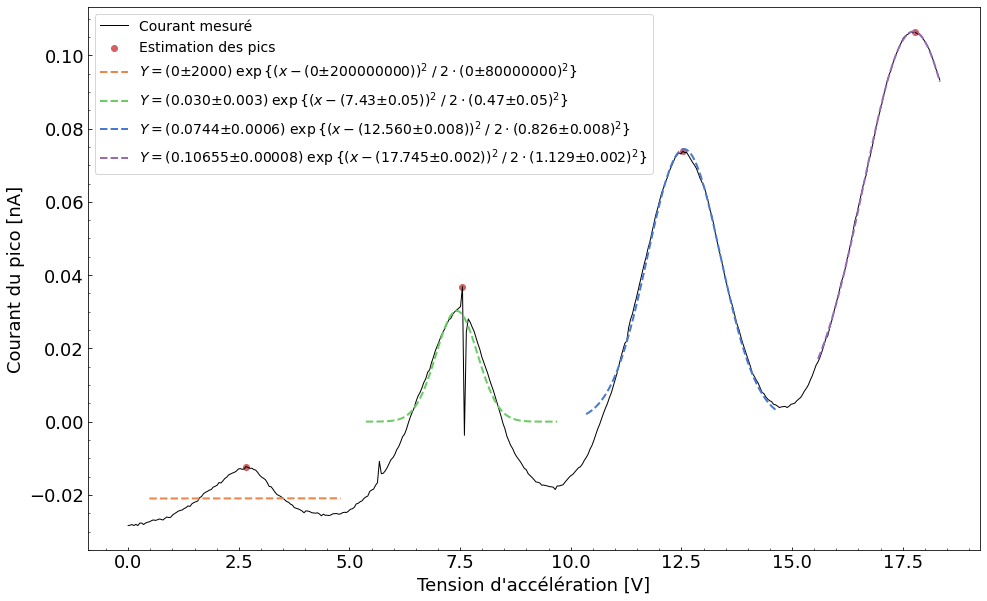

In [147]:
ecarts = np.diff(valeurs_avec_bonnes_unites[liste_des_indexes_des_pics, 0])
ecart_std = np.std(ecarts)
ecart_moyen = np.mean(ecarts)
tension_u1 = 4.0
tension_u2 = valeurs_avec_bonnes_unites[liste_des_indexes_des_pics, 0][0]
potentiel_contact = tension_u1 + tension_u2 - ecart_moyen
print(f"Taux de variation de la tension du générateur de rampe en fonction du temps : {round(facteur_valeur, facteur_incertitude)} [V/s]")
print(f"Estimation des pics : {valeurs_avec_bonnes_unites[liste_des_indexes_des_pics, 0]} [V]")
print(f"Écart moyen entre chaque pic (V_{{res}}) : {round(ecart_moyen, ecart_std)} [V]")
print(f"Potentiel de contact (W) : {round(potentiel_contact, decimals=3)} [V]")

plt.figure(figsize=(16,10))

# Tracer les données de courant en fonction de la tension
plt.plot(valeurs_avec_bonnes_unites[:, 0], valeurs_avec_bonnes_unites[:, 1], label="Courant mesuré",
          color="black", linewidth=1)

# Tracer les emplacements approximatifs des maximums
plt.scatter(valeurs_avec_bonnes_unites[liste_des_indexes_des_pics, 0],
          valeurs_avec_bonnes_unites[liste_des_indexes_des_pics, 1],
          label="Estimation des pics", color=palette[3], marker='o')

# Tracer les ajustements gaussiens
plt.plot(valeurs_avec_bonnes_unites[pic1_index_start:pic1_index_end,0],
          gaus(valeurs_avec_bonnes_unites[pic1_index_start:pic1_index_end,0],
          peak1[0][0], peak1[0][1], peak1[0][2]),
          label=f"$Y = ({rounding_peaks(peak1)[0]})\;\exp\{{(x-({rounding_peaks(peak1)[1]}))^2\; /\; 2\cdot({rounding_peaks(peak1)[2]})^2\}}$",
          linestyle="dashed", color=palette[1], linewidth=2)
plt.plot(valeurs_avec_bonnes_unites[pic2_index_start:pic2_index_end,0], 
          gaus(valeurs_avec_bonnes_unites[pic2_index_start:pic2_index_end,0], 
          peak2[0][0], peak2[0][1], peak2[0][2]),
          label=f"$Y = ({rounding_peaks(peak2)[0]})\;\exp\{{(x-({rounding_peaks(peak2)[1]}))^2\; /\; 2\cdot({rounding_peaks(peak2)[2]})^2\}}$",
          linestyle="dashed", color=palette[2], linewidth=2)
plt.plot(valeurs_avec_bonnes_unites[pic3_index_start:pic3_index_end,0], 
          gaus(valeurs_avec_bonnes_unites[pic3_index_start:pic3_index_end,0], 
          peak3[0][0], peak3[0][1], peak3[0][2]),
          label=f"$Y = ({rounding_peaks(peak3)[0]})\;\exp\{{(x-({rounding_peaks(peak3)[1]}))^2\; /\; 2\cdot({rounding_peaks(peak3)[2]})^2\}}$",
          linestyle="dashed", color=palette[0], linewidth=2)
plt.plot(valeurs_avec_bonnes_unites[pic4_index_start:pic4_index_end,0],
          gaus(valeurs_avec_bonnes_unites[pic4_index_start:pic4_index_end,0], 
          peak4[0][0], peak4[0][1], peak4[0][2]),
          label=f"$Y = ({rounding_peaks(peak4)[0]})\;\exp\{{(x-({rounding_peaks(peak4)[1]}))^2\; /\; 2\cdot({rounding_peaks(peak4)[2]})^2\}}$",
          linestyle="dashed", color=palette[4], linewidth=2)

plt.xlabel("Tension d'accélération [V]")
plt.ylabel("Courant du pico [nA]")
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='both', direction='in')
plt.minorticks_on()

name, _ = os.path.splitext(os.path.basename(file_name))
#plt.savefig(os.path.join(out_dir, name + ".png"))
plt.show()